Time Series Data-Reliance India stock from 16th October 2023 to 16th October 2024

In [51]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [52]:

# Load the data
data = pd.read_csv('/content/RELI Historical Data.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date (in case it's not sorted)
data = data.sort_values('Date')

<ipython-input-52-2fa3a258a051>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [53]:
data

,Date,Price,Open,High,Low,Vol.,Change %
20,2024-09-17,"2,944.60","2,948.00","2,954.95","2,933.25",2.97M,0.06%
19,2024-09-18,"2,926.90","2,940.00","2,964.00","2,921.10",4.29M,-0.60%
18,2024-09-19,"2,939.35","2,932.50","2,953.00","2,911.10",8.48M,0.43%
17,2024-09-20,"2,971.85","2,948.00","2,990.00","2,942.75",15.45M,1.11%
16,2024-09-23,"2,986.75","2,982.00","3,003.00","2,977.90",4.42M,0.50%
15,2024-09-24,"2,978.75","2,977.00","3,001.00","2,975.75",8.57M,-0.27%
14,2024-09-25,"2,987.90","2,967.80","2,993.00","2,960.40",3.53M,0.31%
13,2024-09-26,"2,995.90","2,981.30","3,008.00","2,976.10",9.41M,0.27%
12,2024-09-27,"3,052.35","2,998.00","3,066.95","2,984.00",10.30M,1.88%
11,2024-09-30,"2,953.15","3,038.80","3,049.95","2,948.80",13.50M,-3.25%


In [54]:

data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [55]:
data.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0


In [56]:
data['Date']

,Date
20,2024-09-17
19,2024-09-18
18,2024-09-19
17,2024-09-20
16,2024-09-23
15,2024-09-24
14,2024-09-25
13,2024-09-26
12,2024-09-27
11,2024-09-30


Plot the Raw Data

Plot the raw stock price data for the period specified (16th October 2023 to 16th October 2024).

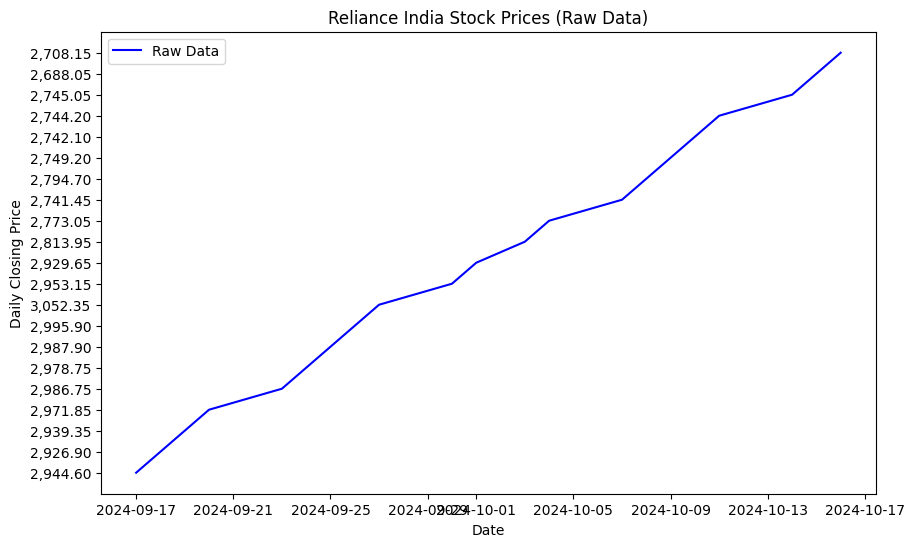

In [57]:
# Plot the raw daily closing price
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Raw Data', color='blue')
plt.title('Reliance India Stock Prices (Raw Data)')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price')
plt.legend()
plt.show()

Simple Moving Average(SMA)

SMA is the unweighted average of a stock's price over a specific period (e.g., 7, 15, 30 days). It smooths out short-term price fluctuations and helps reveal the overall trend. A shorter window responds quickly to price changes, while a longer one shows a more stable long-term trend. It's useful for identifying patterns like upward or downward trends in stock prices.

20    2944.60
19    2926.90
18    2939.35
17    2971.85
16    2986.75
Name: Price, dtype: float64


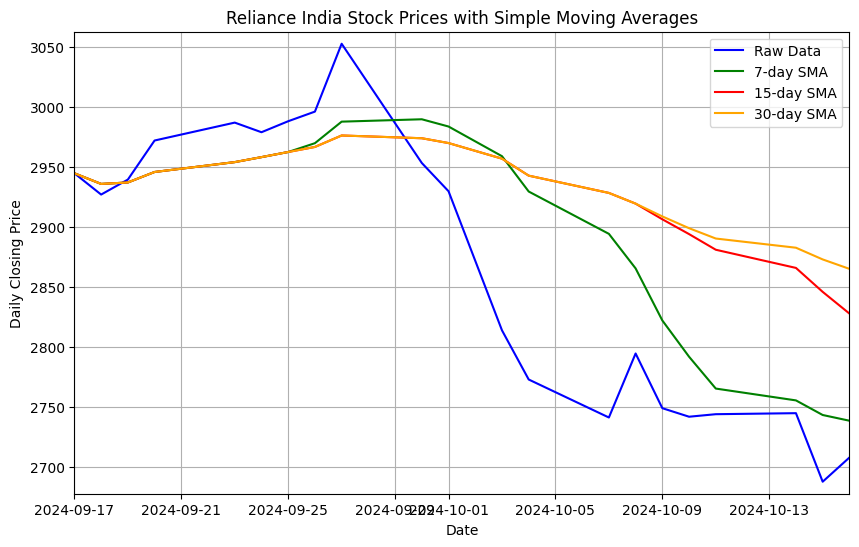

<Figure size 2500x1200 with 0 Axes>

In [59]:
# Remove commas from 'Price' and convert it to numeric
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Ensure the data is now numeric
print(data['Price'].head())  # Check the first few rows to ensure conversion worked

# Plot the raw data after conversion
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Raw Data', color='blue')

# Simple Moving Average (SMA) function
def plot_sma(window_size, color, label):
    sma = data['Price'].rolling(window=window_size, min_periods=1).mean()
    plt.plot(data['Date'], sma, label=label, color=color)

# Plot SMAs for 7, 15, 30 days
plot_sma(7, 'green', '7-day SMA')
plot_sma(15, 'red', '15-day SMA')
plot_sma(30, 'orange', '30-day SMA')

# Add gridlines for better readability
plt.grid(True)

# Set axis limits to ensure proper scaling
plt.xlim([data['Date'].min(), data['Date'].max()])
plt.ylim([data['Price'].min() - 10, data['Price'].max() + 10])  # Slightly expand y-limits for better visibility

# Add title, labels, and legend
plt.title('Reliance India Stock Prices with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price')
plt.legend()
plt.figure(figsize=(25, 12))
# Ensure the plot is shown
plt.show()


Centered Moving Average

CMA averages the prices from an equal number of days before and after a central point, offering a balanced view of past and future data. This technique is more common in time series forecasting and helps to smooth cyclical trends by minimizing lag, making it ideal for recognizing repetitive patterns over time.

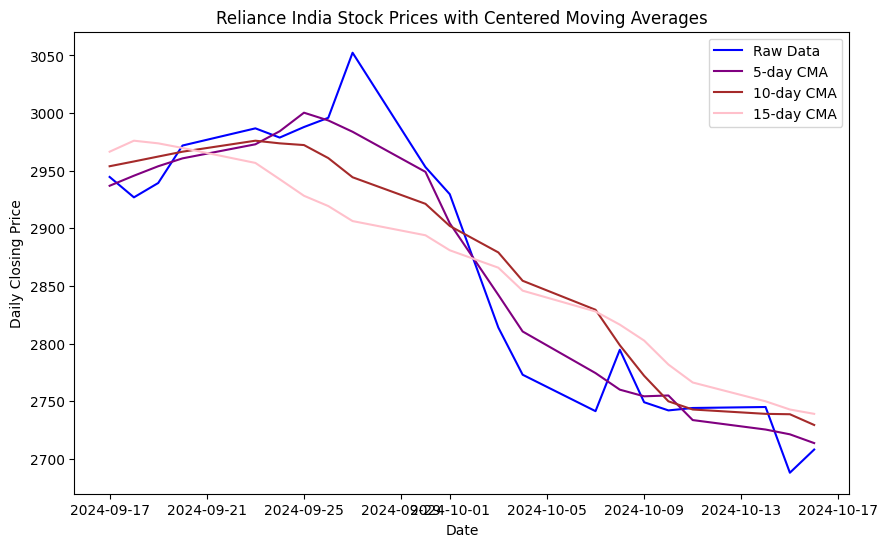

In [62]:
# Centered Moving Average (CMA) function
def plot_cma(window_size, color, label):
    cma = data['Price'].rolling(window=window_size, center=True, min_periods=1).mean()
    plt.plot(data['Date'], cma, label=label, color=color)

# Plot the raw data
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Raw Data', color='blue')

# Plot CMAs for 5, 10, and 15 days
plot_cma(5, 'purple', '5-day CMA')
plot_cma(10, 'brown', '10-day CMA')
plot_cma(15, 'pink', '15-day CMA')

plt.title('Reliance India Stock Prices with Centered Moving Averages')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price')

plt.legend()
plt.show()


Weighted Moving Average (WMA)

WMA assigns greater importance to more recent prices by giving them higher weights, making it more responsive to recent price changes compared to SMA. It's useful for traders who want to capture the latest trends quickly, but it can also be more sensitive to short-term market fluctuation

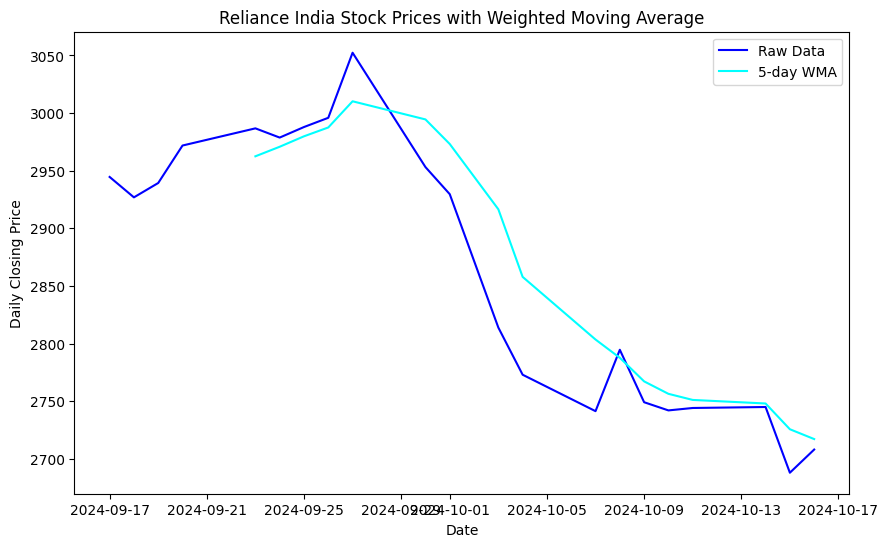

In [63]:
import numpy as np

# Weighted Moving Average (WMA) function
def weighted_moving_average(values, weights):
    return np.convolve(values, weights[::-1], 'valid') / sum(weights)

# Assign weights: more recent days get higher weights
weights = np.array([1, 2, 3, 4, 5])

# Apply the WMA to the 'Price' column
wma = weighted_moving_average(data['Price'], weights)

# Adjust dates for plotting (due to 'valid' convolution, it trims the length)
adjusted_dates = data['Date'][len(data['Date']) - len(wma):]

# Plot the raw data
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Raw Data', color='blue')

# Plot the WMA
plt.plot(adjusted_dates, wma, label='5-day WMA', color='cyan')

plt.title('Reliance India Stock Prices with Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price')


plt.legend()
plt.show()
